# OASIS TASK - 2
# UNEMPLOYMENT ANALYSIS WITH PYTHON
#### Unemployment is measured by the unemployment rate which is the number of people
#### who are unemployed as a percentage of the total labour force. We have seen a sharp
#### increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
#### can be a good data science project. 

## IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## IMPORTING THE DATASET

In [41]:
dataset=pd.read_csv("Unemployment in India.csv")

In [42]:
dataset.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [43]:
dataset.shape

(768, 7)

In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


### NUMERICAL FEATURES

In [45]:
#numercal columns
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtype!='O']

In [46]:
print(len(numerical_features))
print(numerical_features)

3
[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']


In [47]:
dataset.iloc[:,3].unique()

array([ 3.65,  3.05,  3.75,  3.32,  5.17,  3.52,  4.12,  4.38,  4.84,
        5.91,  4.06, 16.29, 14.46,  0.85,  4.29,  5.08,  4.26,  5.79,
        4.46,  4.65,  4.66,  3.26,  3.77,  9.38,  0.  ,  9.27, 10.2 ,
       13.44, 11.  ,  8.87, 12.47, 12.4 , 10.16,  9.13,  9.61, 15.39,
       45.09, 47.26, 20.49,  9.82,  6.76,  4.54,  4.64,  8.33,  6.96,
        2.77,  6.11,  9.89,  7.89,  7.31,  7.64, 10.14, 12.56,  9.33,
       11.07, 17.18, 12.5 , 15.84, 11.11, 16.97, 13.48, 13.81, 15.18,
       20.69, 22.76, 21.14,  2.91,  5.45, 10.98,  1.98,  3.61,  7.21,
       23.71,  3.54,  5.38, 15.91, 20.  ,  2.88,  4.77,  4.58,  3.7 ,
        6.29,  4.91,  4.68,  3.46,  5.35,  6.64,  7.59, 12.  , 14.58,
        1.41, 14.54, 23.08, 16.22, 30.94, 16.36, 24.17, 16.59, 29.56,
       16.21, 27.19, 23.92, 41.61, 34.22, 35.57, 13.68, 11.43, 20.59,
       18.56, 15.98, 15.81, 22.86, 19.46, 16.67, 15.42, 17.71,  2.13,
       25.64,  1.12, 12.78, 12.09, 13.67, 11.32, 19.27, 14.73, 22.19,
       21.23, 16.  ,

In [48]:
dataset.iloc[:,4].unique()

array([11999139., 11755881., 12086707., 12285693., 12256762., 12017412.,
       11397681., 12528395., 12016676., 11723617., 11359660.,  8792827.,
        9526902., 15572975., 11749334.,  8923222.,  9911534.,  9292039.,
       11468349.,  8395906.,  9625362., 11420996.,  8462814.,  9878742.,
        9926176.,  7544937., 24322330., 24097712., 23248875., 22260203.,
       23905700., 24053140., 22445989., 22914530., 23409006., 23168192.,
       22667882., 14645275., 14050319., 20622566.,  6259019.,  6608626.,
        6753622.,  6607694.,  6490776.,  7043840.,  6942931.,  6569385.,
        6236201.,  6847173.,  6894808.,  6534321.,  5454091.,  5781095.,
         169487.,   149076.,   166605.,   135407.,   166056.,   149511.,
         178768.,   145671.,   157791.,   147500.,   152413.,   115487.,
         129610.,   112108.,   179340.,   170471.,   167437.,   183603.,
         163215.,   177440.,   159489.,   177155.,   158936.,   171672.,
         181657.,   128538., 13954728., 13199281., 

In [49]:
dataset.iloc[:,5].unique()

array([43.24, 42.05, 43.5 , 43.97, 44.68, 43.01, 41.  , 45.14, 43.46,
       42.83, 40.66, 36.03, 38.16, 53.76, 57.39, 43.87, 48.21, 45.83,
       55.67, 40.76, 46.64, 54.9 , 40.17, 47.05, 50.  , 34.38, 39.75,
       39.71, 39.66, 36.85, 38.57, 40.31, 37.51, 37.25, 37.54, 37.28,
       38.88, 38.63, 38.5 , 37.4 , 42.89, 43.71, 43.53, 42.55, 43.38,
       46.28, 43.56, 42.59, 42.03, 45.05, 44.98, 39.43, 35.56, 38.66,
       42.33, 35.74, 40.53, 35.21, 40.68, 37.9 , 42.71, 37.08, 38.36,
       35.84, 37.45, 30.21, 34.65, 29.22, 39.16, 38.19, 39.81, 39.61,
       35.78, 40.36, 44.09, 38.7 , 35.36, 36.11, 45.36, 33.71, 52.03,
       50.12, 54.21, 50.57, 51.01, 52.27, 54.55, 51.51, 54.07, 53.48,
       52.06, 34.77, 46.31, 47.72, 45.12, 45.23, 42.17, 48.23, 44.72,
       46.07, 42.48, 47.4 , 43.74, 45.37, 41.4 , 49.85, 42.78, 48.53,
       44.23, 41.18, 44.91, 45.02, 42.81, 48.5 , 44.05, 45.11, 42.45,
       18.43, 42.62, 41.2 , 40.57, 39.02, 41.71, 44.17, 43.08, 39.69,
       42.56, 38.25,

### CATEGORICAL FEATURES

In [50]:
#categorical features
categorical_features=[feature for feature in dataset.columns if feature not in numerical_features]

In [52]:
print(len(categorical_features))

print(categorical_features)

4
['Region', ' Date', ' Frequency', 'Area']


In [53]:
print(len(dataset["Region"].unique()))
dataset["Region"].unique()

29


array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

In [54]:
print(len(dataset.iloc[:,2].unique()))
dataset.iloc[:,2].unique()

3


array([' Monthly', nan, 'Monthly'], dtype=object)

In [55]:
print(len(dataset["Area"].unique()))
dataset["Area"].unique()

3


array(['Rural', nan, 'Urban'], dtype=object)

### CHECKING THE NULL VALUES

In [56]:
dataset.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

### DROPING THE NULL VALUES

In [57]:
dataset.dropna(inplace=True)

In [58]:
dataset.shape

(740, 7)

### CHECKING FOR THE DUPLICATE VALUES

In [59]:
dataset[dataset.duplicated()]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area


### PREPROCESSING THE DATASET

In [65]:
dataset.iloc[:,1]=pd.to_datetime(dataset.iloc[:,1])

In [78]:
dataset.head()

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,year,month,day
0,Andhra Pradesh,3.65,11999139.0,43.24,Rural,2019,5,31
1,Andhra Pradesh,3.05,11755881.0,42.05,Rural,2019,6,30
2,Andhra Pradesh,3.75,12086707.0,43.50,Rural,2019,7,31
3,Andhra Pradesh,3.32,12285693.0,43.97,Rural,2019,8,31
4,Andhra Pradesh,5.17,12256762.0,44.68,Rural,2019,9,30


In [82]:
dataset.columns=['Region','Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)','Area','year','month','day']

In [70]:
dataset['year']=dataset.iloc[:,1].dt.year

In [71]:
dataset['month']=dataset.iloc[:,1].dt.month
dataset['day']=dataset.iloc[:,1].dt.day

In [75]:
dataset.drop(dataset.columns[1],axis=1,inplace=True)

In [77]:
dataset.drop(dataset.columns[1],axis=1,inplace=True)

In [104]:
data_state_wise=dataset.groupby(['Region'])['Estimated Unemployment Rate (%)'].sum().reset_index()

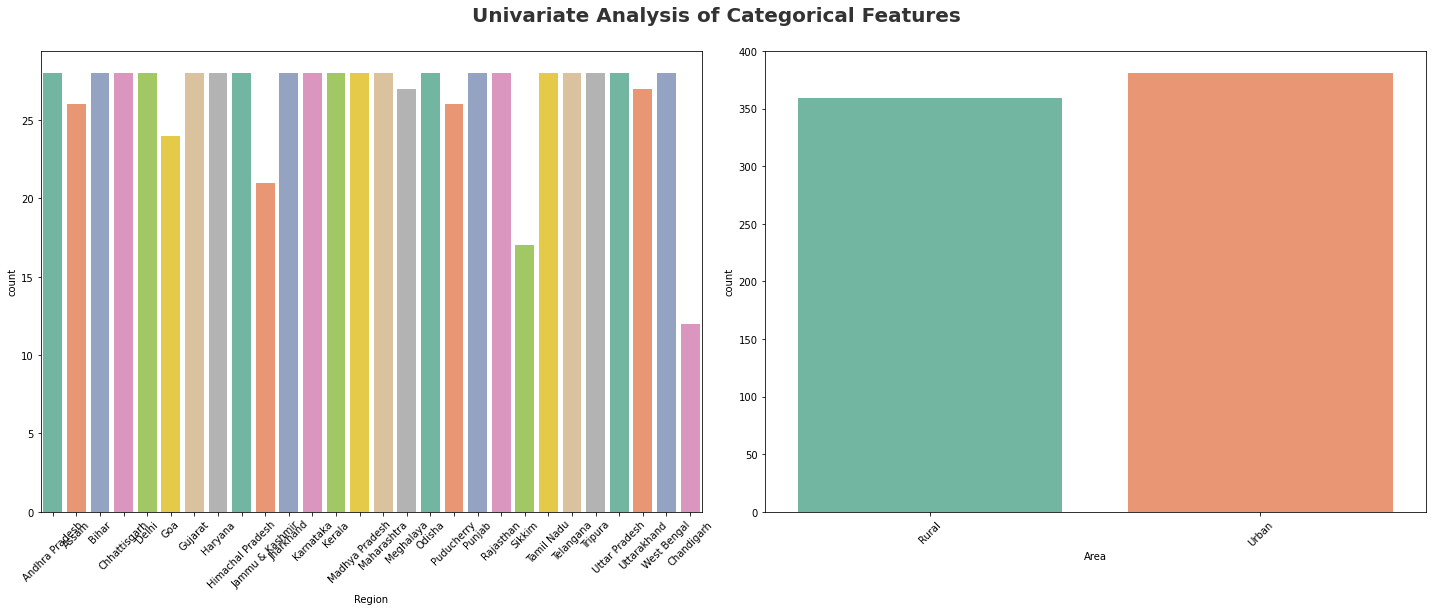

In [100]:
# categorical columns
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=dataset[categorical_features[i]],palette="Set2")
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

<AxesSubplot:ylabel='Region'>

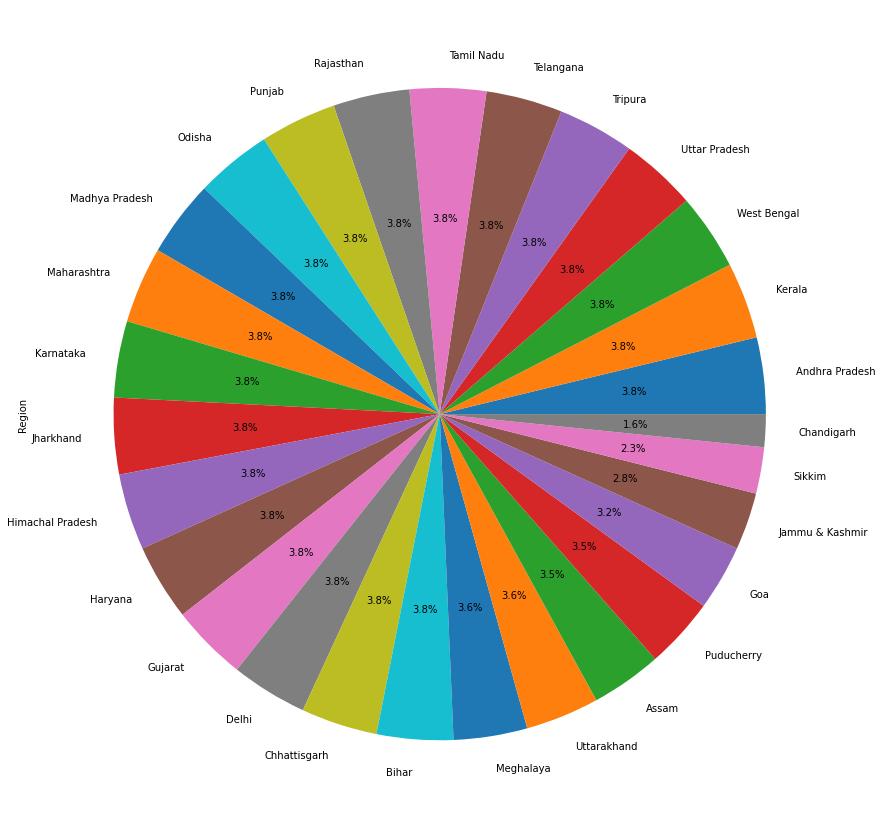

In [101]:
dataset["Region"].value_counts().plot.pie(y=dataset["Region"],figsize=(15,15),autopct='%1.1f%%')

In [105]:
data_state_wise

,Region,Estimated Unemployment Rate (%)
0,Andhra Pradesh,209.36
1,Assam,167.13
2,Bihar,529.71
3,Chandigarh,191.90
4,Chhattisgarh,258.73
5,Delhi,461.87
6,Goa,222.58
7,Gujarat,186.59
8,Haryana,735.93
9,Himachal Pradesh,519.13


Text(0.5, 1.0, 'states vs unemployment')

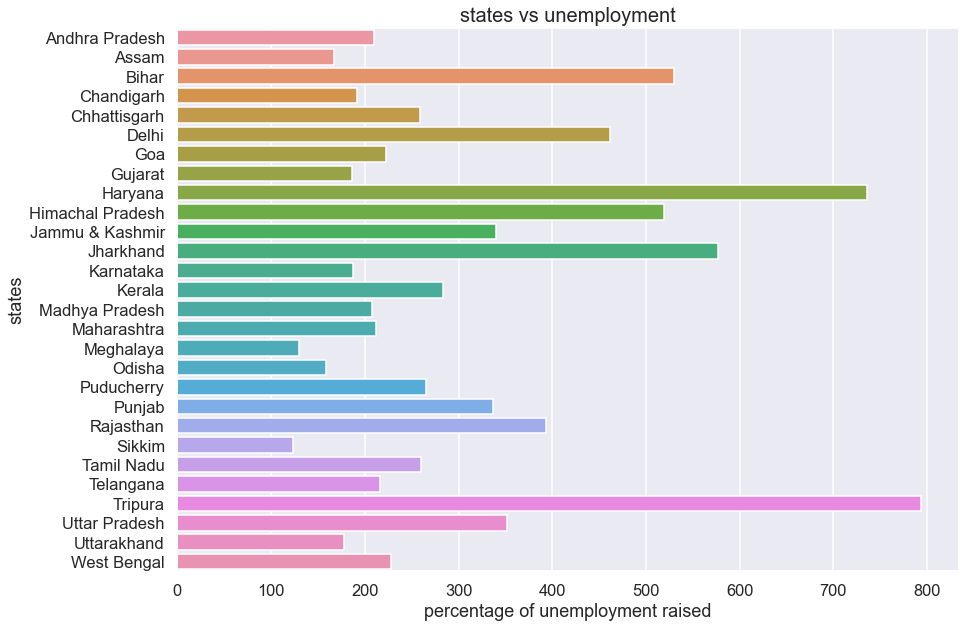

In [111]:
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot( x = 'Estimated Unemployment Rate (%)' ,y = 'Region' , data = data_state_wise )
ax.set_xlabel('percentage of unemployment raised')
ax.set_ylabel('states')
ax.set_title("states vs unemployment", size = 20)

## OBSERVATIONS FROM THE ABOVE GRAPH

### THE MAXIMUM UNAEMPLOMENT RATE IS PRESENT IN UTTAR PRADESH, HARYANA, JHARKHAND AND THE MINIMUM UNEMPLOYMENT RATE IS SIKKIM AND MEGHALAYA

In [113]:
data_state_wise_with=dataset.groupby(['Region'])['Estimated Labour Participation Rate (%)'].sum().reset_index()

In [114]:
data_state_wise_with

,Region,Estimated Labour Participation Rate (%)
0,Andhra Pradesh,1102.52
1,Assam,1166.58
2,Bihar,1068.31
3,Chandigarh,472.04
4,Chhattisgarh,1198.70
5,Delhi,1090.03
6,Goa,941.99
7,Gujarat,1290.83
8,Haryana,1196.64
9,Himachal Pradesh,1238.22


Text(0.5, 1.0, 'states vs Labour Participation')

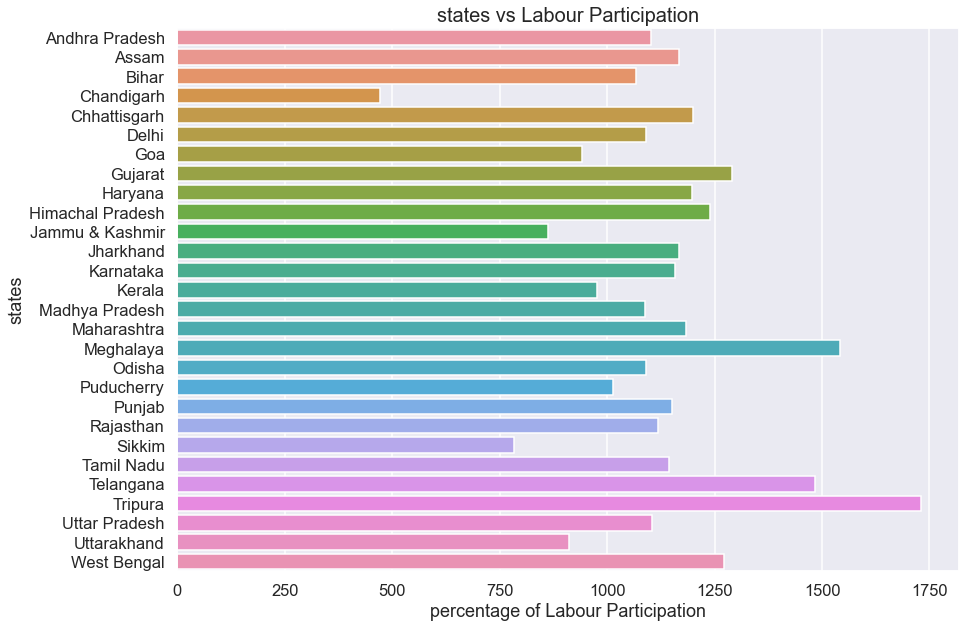

In [120]:
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot( x = 'Estimated Labour Participation Rate (%)' ,y = 'Region' , data = data_state_wise_with )
ax.set_xlabel('percentage of Labour Participation')
ax.set_ylabel('states')
ax.set_title("states vs Labour Participation", size = 20)

## OBSERVATIONS FROM THE GRAPH
### THE MAXIMUM PECENTAGE OF LABOUR PARTICIPATION IS IN TRIPURA, MEGHALAYA AND THE MINIMUM PECENTAGE OF LABOUR PARTICIPATION IS IN CHANDIGHAR,SIKKIM

In [116]:
data_area_wise=dataset.groupby(['Area'])['Estimated Unemployment Rate (%)'].mean().reset_index()

In [117]:
data_area_wise

,Area,Estimated Unemployment Rate (%)
0,Rural,10.324791
1,Urban,13.166614


Text(0.5, 1.0, 'Area vs unemployment')

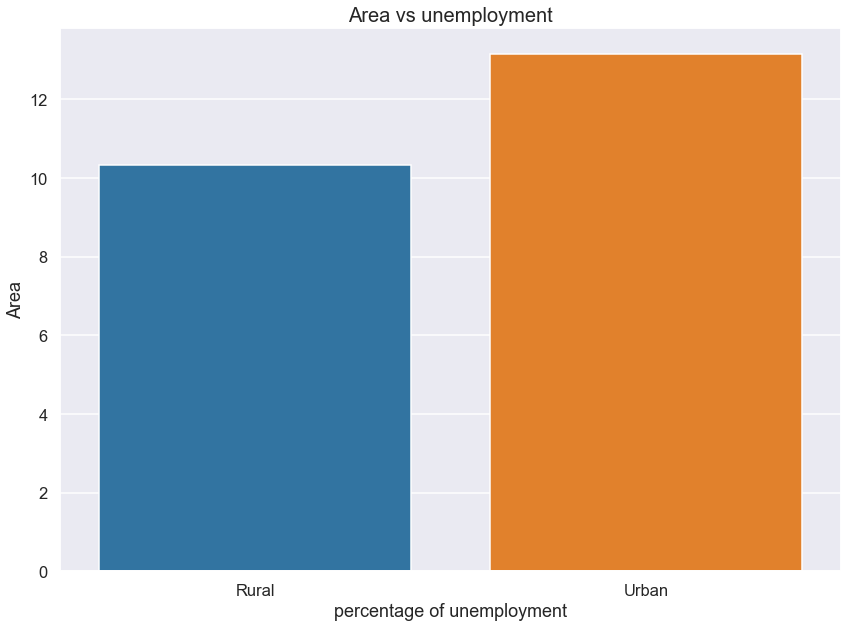

In [119]:
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot( x = 'Area' ,y = 'Estimated Unemployment Rate (%)' , data = data_area_wise )
ax.set_xlabel('percentage of unemployment')
ax.set_ylabel('Area')
ax.set_title("Area vs unemployment", size = 20)

## OBSERVATIONS FROM ABOVE GRAPH
### THE RURAL AREA HAS MINIMUM UNEMPLOYMENT RATE THAN THE URBAN AREA

In [122]:
data_area_wise_with=dataset.groupby(['Area'])['Estimated Labour Participation Rate (%)'].sum().reset_index()

In [123]:
data_area_wise_with

,Area,Estimated Labour Participation Rate (%)
0,Rural,15962.87
1,Urban,15583.42


Text(0.5, 1.0, 'area vs Labour Participation')

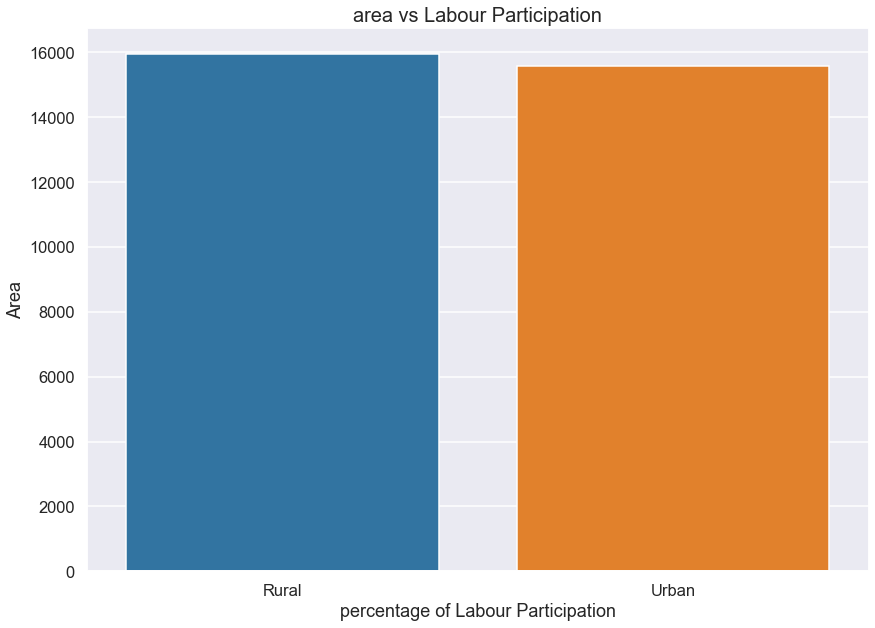

In [124]:
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot( x = 'Area' ,y = 'Estimated Labour Participation Rate (%)' , data = data_area_wise_with )
ax.set_xlabel('percentage of Labour Participation')
ax.set_ylabel('Area')
ax.set_title("area vs Labour Participation", size = 20)

## OBSERVATIONS FROM THE ABOVE GRAPH
### THE RURAL AREA HAS MAXIMUM PERCENTAGE OF LABOUR PARTICIPATION THAN URBAN AREA

In [125]:
dataset['year'].unique()

array([2019, 2020], dtype=int64)

In [127]:
data_year_wise=dataset.groupby(['year'])['Estimated Unemployment Rate (%)'].sum().reset_index()

Text(0.5, 1.0, 'year vs Unemployment Rate')

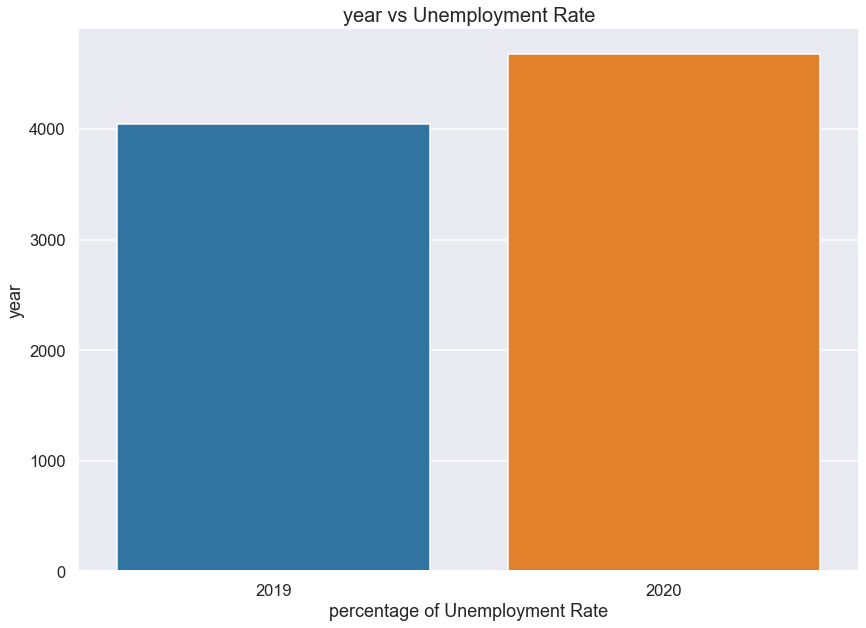

In [130]:
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot( x = 'year' ,y = 'Estimated Unemployment Rate (%)' , data = data_year_wise )
ax.set_xlabel('percentage of Unemployment Rate')
ax.set_ylabel('year')
ax.set_title("year vs Unemployment Rate", size = 20)

## OBSERVATIONS FROM ABOVE GRAPH
### THE 2020 YEAR HAS MAXIMUM PERCENTAGE OF UNEMPLOYMENT THAN 2019.

In [131]:
dataset['month'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4], dtype=int64)

In [132]:
data_month_wise=dataset.groupby(['month'])['Estimated Unemployment Rate (%)'].mean().reset_index()

Text(0.5, 1.0, 'month vs Unemployment Rate')

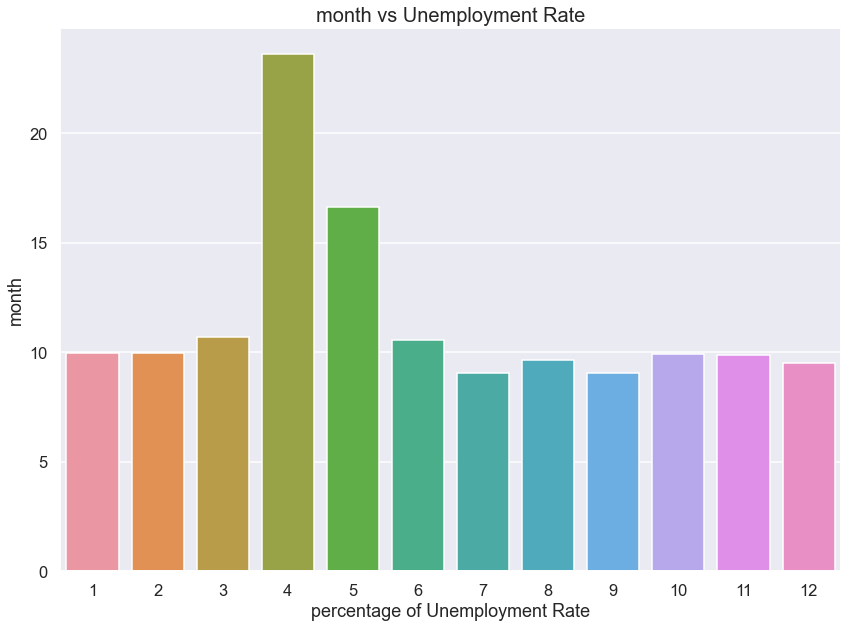

In [133]:
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot( x = 'month' ,y = 'Estimated Unemployment Rate (%)' , data = data_month_wise )
ax.set_xlabel('percentage of Unemployment Rate')
ax.set_ylabel('month')
ax.set_title("month vs Unemployment Rate", size = 20)

## OBSERVATIONS FROM ABOVE GRAPH
### IN THE MONTH OF APRIL HAS THE MAXIMUM PERCENTAGE OF UNEMPLOYMENT.